In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read the data
df = pd.read_csv("/Users/vinuthnachillakuru/Desktop/Final_Sem_proj/Project_Refined1.csv",header=0, low_memory=False)

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(1032375, 37)
PrimaryKey                        int64
CallConfirmedDT                  object
ShiftDay                         object
TourOfShift                       int64
IncidentFirstDue                float64
InitialIncidentType              object
DispatchedIncidentType           object
ArrivedIncidentType              object
FinalIncidentType                object
FinalIncidentTypeDescription     object
MutualAidReceived                  bool
ResponseUnitID                   object
TransportUnitID                  object
TransportUnitLOC                 object
UnitPrimaryActionTaken           object
UnitOtherActionsTaken            object
UnitStation                      object
UnitType                         object
UnitArrivalOrder                float64
UnitTransportedDT                object
UnitTransportedArrivalDT         object
PersonnelID                      object
PersonnelRole                    object
TransportLOC                     object
TransportHospitalCode     

In [2]:
df.isna().sum().sum()

3333536

In [3]:
df[df.columns[df.isnull().any()]].isnull().sum()

IncidentFirstDue                    24
ArrivedIncidentType               1268
FinalIncidentTypeDescription       244
UnitPrimaryActionTaken              62
UnitOtherActionsTaken           637360
UnitStation                        163
UnitArrivalOrder                 88069
UnitTransportedDT               589765
UnitTransportedArrivalDT        594342
PersonnelID                          2
PersonnelRole                        1
TransportLOC                      4149
TransportHospitalCode             4285
TransportHospitalName             4285
ReasonForChoosingHospital         4281
PatientID                            1
PatientAge                          11
PrimaryImpression                   21
SecondaryImpression                 21
PatientDisposition                   1
ProcedurePrimaryKey             230939
ProcedurePerformed              230939
MedicationPrimaryKey            471634
MedicationGiven                 471668
isALS_LOC                            1
dtype: int64

In [4]:
df

,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,...,PatientID,PatientAge,PrimaryImpression,SecondaryImpression,PatientDisposition,ProcedurePrimaryKey,ProcedurePerformed,MedicationPrimaryKey,MedicationGiven,isALS_LOC
0,1074428032,5/28/19 0:45,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111.0,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164292.0,CV - ECG - 12 Lead Obtained,NaN,NaN,False
1,1074428032,5/28/19 0:45,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111.0,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164288.0,IV Start - Extremity Vein (arm or leg),NaN,NaN,False
2,1074428032,5/28/19 0:45,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111.0,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164291.0,CV - ECG - 12 Lead Obtained,NaN,NaN,False
3,1074428032,5/28/19 0:45,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111.0,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164288.0,IV Start - Extremity Vein (arm or leg),NaN,NaN,False
4,1074428032,5/28/19 0:45,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111.0,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164291.0,CV - ECG - 12 Lead Obtained,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032370,1204233274,9/14/20 16:06,A,1,423.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ,...,1347795.0,30 - 39,Injury - Forearm (S59.91),Not Applicable,"Treated, Transferred Care",NaN,NaN,NaN,NaN,False
1032371,1204233285,8/25/20 16:27,B,3,423.0,ALS,ALS,CPRF,CPRF,CARDIAC ARREST - CPR IN PROGRESS,...,1330919.0,50 - 59,Environment - Heat Exhaustion/Stroke (T67.5),Not Applicable,Treated & Transported,1234319.0,IV Start - Extremity Vein (arm or leg),432891.0,Normal saline,True
1032372,1204233285,8/25/20 16:27,B,3,423.0,ALS,ALS,CPRF,CPRF,CARDIAC ARREST - CPR IN PROGRESS,...,1330919.0,50 - 59,Environment - Heat Exhaustion/Stroke (T67.5),Not Applicable,Treated & Transported,1234320.0,CV - ECG - 12 Lead Obtained,432891.0,Normal saline,True
1032373,1204233285,8/25/20 16:27,B,3,423.0,ALS,ALS,CPRF,CPRF,CARDIAC ARREST - CPR IN PROGRESS,...,1330919.0,50 - 59,Environment - Heat Exhaustion/Stroke (T67.5),Not Applicable,Treated & Transported,1234319.0,IV Start - Extremity Vein (arm or leg),432891.0,Normal saline,True


<AxesSubplot:>

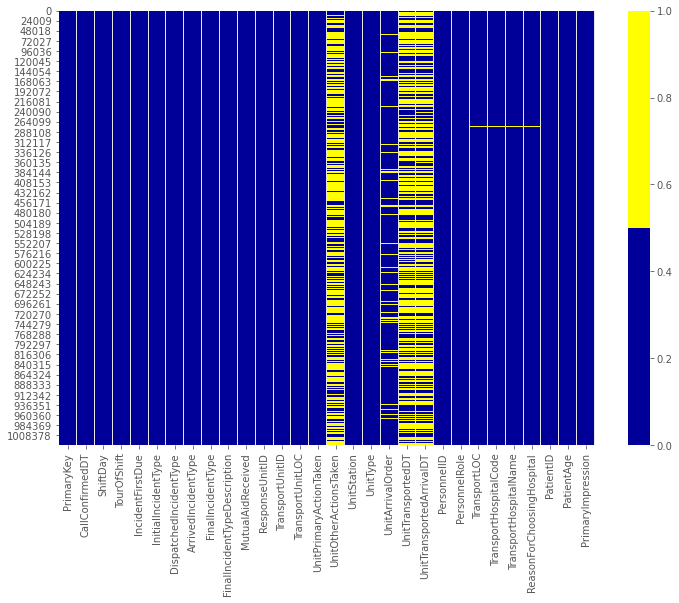

In [5]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PrimaryKey - 0%
CallConfirmedDT - 0%
ShiftDay - 0%
TourOfShift - 0%
IncidentFirstDue - 0%
InitialIncidentType - 0%
DispatchedIncidentType - 0%
ArrivedIncidentType - 0%
FinalIncidentType - 0%
FinalIncidentTypeDescription - 0%
MutualAidReceived - 0%
ResponseUnitID - 0%
TransportUnitID - 0%
TransportUnitLOC - 0%
UnitPrimaryActionTaken - 0%
UnitOtherActionsTaken - 62%
UnitStation - 0%
UnitType - 0%
UnitArrivalOrder - 9%
UnitTransportedDT - 57%
UnitTransportedArrivalDT - 58%
PersonnelID - 0%
PersonnelRole - 0%
TransportLOC - 0%
TransportHospitalCode - 0%
TransportHospitalName - 0%
ReasonForChoosingHospital - 0%
PatientID - 0%
PatientAge - 0%
PrimaryImpression - 0%
SecondaryImpression - 0%
PatientDisposition - 0%
ProcedurePrimaryKey - 22%
ProcedurePerformed - 22%
MedicationPrimaryKey - 46%
MedicationGiven - 46%
isALS_LOC - 0%


In [9]:
df.isnull().sum()

PrimaryKey                           0
CallConfirmedDT                      0
ShiftDay                             0
TourOfShift                          0
IncidentFirstDue                    24
InitialIncidentType                  0
DispatchedIncidentType               0
ArrivedIncidentType               1268
FinalIncidentType                    0
FinalIncidentTypeDescription       244
MutualAidReceived                    0
ResponseUnitID                       0
TransportUnitID                      0
TransportUnitLOC                     0
UnitPrimaryActionTaken              62
UnitOtherActionsTaken           637360
UnitStation                        163
UnitType                             0
UnitArrivalOrder                 88069
UnitTransportedDT               589765
UnitTransportedArrivalDT        594342
PersonnelID                          2
PersonnelRole                        1
TransportLOC                      4149
TransportHospitalCode             4285
TransportHospitalName    

In [8]:
nulls = df.isnull().sum()/df.shape[0]

In [11]:
not_null = df.notnull().sum()/df.shape[0]

In [12]:
table = {
    'ColumnName':df.columns.to_series(),
    '%Null': nulls,
    '%Non Null': not_null
    }

In [13]:
table = pd.DataFrame(table)

In [14]:
table.reset_index(drop=True, inplace=True)

In [15]:
table

,ColumnName,%Null,%Non Null
0,PrimaryKey,0.000000e+00,1.000000
1,CallConfirmedDT,0.000000e+00,1.000000
2,ShiftDay,0.000000e+00,1.000000
3,TourOfShift,0.000000e+00,1.000000
4,IncidentFirstDue,2.324737e-05,0.999977
5,InitialIncidentType,0.000000e+00,1.000000
6,DispatchedIncidentType,0.000000e+00,1.000000
7,ArrivedIncidentType,1.228236e-03,0.998772
8,FinalIncidentType,0.000000e+00,1.000000
9,FinalIncidentTypeDescription,2.363482e-04,0.999764


In [35]:
count = df.isnull().sum()

In [45]:
data_new = df.drop("UnitOtherActionsTaken")

In [54]:
data_new["UnitTransportedDT"].fillna("Unknown", inplace = True)

KeyError: 'UnitTransportedDT'

In [19]:
d1=data_new.drop(['PrimaryKey','CallConfirmedDT','ShiftDay','TourOfShift','IncidentFirstDue','InitialIncidentType','DispatchedIncidentType','FinalIncidentType','FinalIncidentTypeDescription','MutualAidReceived','ResponseUnitID','TransportUnitID','TransportUnitLOC','UnitPrimaryActionTaken','UnitStation','UnitType','PersonnelID','PersonnelRole','PatientID','PatientAge','PrimaryImpression','SecondaryImpression','PatientDisposition','isALS_LOC'],axis = 1)


In [20]:
d1

,ArrivedIncidentType,UnitArrivalOrder,UnitTransportedDT,UnitTransportedArrivalDT,TransportLOC,TransportHospitalCode,TransportHospitalName,ReasonForChoosingHospital,ProcedurePrimaryKey,ProcedurePerformed,MedicationPrimaryKey,MedicationGiven
0,ALS,1.0,NaN,NaN,Level 3: 1 Provider (ALS Care),95.0,Reston Hospital Center,Patient's Choice,1164292.0,CV - ECG - 12 Lead Obtained,NaN,NaN
1,ALS,2.0,5/28/19 1:08,5/28/19 1:18,Level 3: 1 Provider (ALS Care),95.0,Reston Hospital Center,Patient's Choice,1164288.0,IV Start - Extremity Vein (arm or leg),NaN,NaN
2,ALS,2.0,5/28/19 1:08,5/28/19 1:18,Level 3: 1 Provider (ALS Care),95.0,Reston Hospital Center,Patient's Choice,1164291.0,CV - ECG - 12 Lead Obtained,NaN,NaN
3,ALS,2.0,5/28/19 1:08,5/28/19 1:18,Level 3: 1 Provider (ALS Care),95.0,Reston Hospital Center,Patient's Choice,1164288.0,IV Start - Extremity Vein (arm or leg),NaN,NaN
4,ALS,2.0,5/28/19 1:08,5/28/19 1:18,Level 3: 1 Provider (ALS Care),95.0,Reston Hospital Center,Patient's Choice,1164291.0,CV - ECG - 12 Lead Obtained,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1032370,ACCIF,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032371,CPRF,2.0,NaN,NaN,Level 1: 3 or More Providers (ALS Care),16.0,Fairfax Hospital,Closest Facility,1234319.0,IV Start - Extremity Vein (arm or leg),432891.0,Normal saline
1032372,CPRF,2.0,NaN,NaN,Level 1: 3 or More Providers (ALS Care),16.0,Fairfax Hospital,Closest Facility,1234320.0,CV - ECG - 12 Lead Obtained,432891.0,Normal saline
1032373,CPRF,NaN,NaN,NaN,Level 1: 3 or More Providers (ALS Care),16.0,Fairfax Hospital,Closest Facility,1234319.0,IV Start - Extremity Vein (arm or leg),432891.0,Normal saline


In [47]:
d1['UnitTransportedDT'].fillna("Unknown", inplace = True)

In [48]:
d1['UnitTransportedArrivalDT'].fillna("Unknown", inplace = True)

<AxesSubplot:>

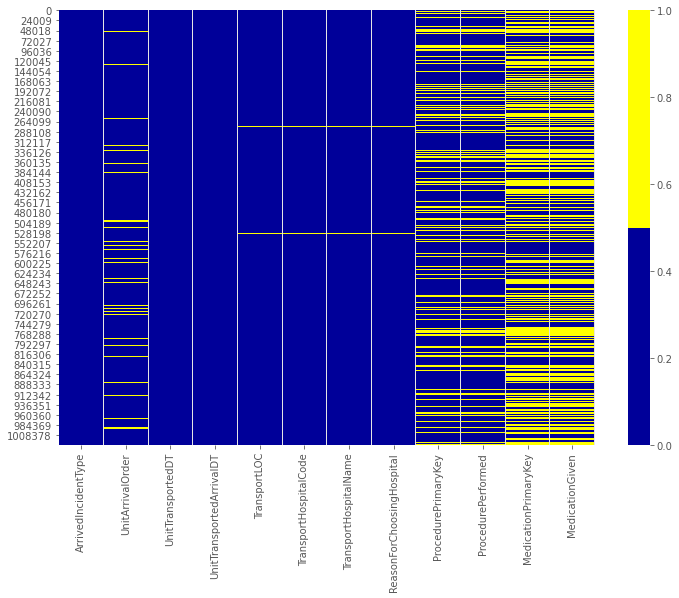

In [30]:
cols = data_new.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(d1[cols].isnull(), cmap=sns.color_palette(colours))

In [25]:
count1=d1.isnull().sum()

In [26]:
count1

ArrivedIncidentType            1268
UnitArrivalOrder              88069
UnitTransportedDT                 0
UnitTransportedArrivalDT          0
TransportLOC                   4149
TransportHospitalCode          4285
TransportHospitalName          4285
ReasonForChoosingHospital      4281
ProcedurePrimaryKey          230939
ProcedurePerformed           230939
MedicationPrimaryKey         471634
MedicationGiven              471668
dtype: int64

In [27]:
df=pd.DataFrame(count)

In [28]:
print(df)

                                   0
PrimaryKey                         0
CallConfirmedDT                    0
ShiftDay                           0
TourOfShift                        0
IncidentFirstDue                  24
InitialIncidentType                0
DispatchedIncidentType             0
ArrivedIncidentType             1268
FinalIncidentType                  0
FinalIncidentTypeDescription     244
MutualAidReceived                  0
ResponseUnitID                     0
TransportUnitID                    0
TransportUnitLOC                   0
UnitPrimaryActionTaken            62
UnitOtherActionsTaken         637360
UnitStation                      163
UnitType                           0
UnitArrivalOrder               88069
UnitTransportedDT             589765
UnitTransportedArrivalDT      594342
PersonnelID                        2
PersonnelRole                      1
TransportLOC                    4149
TransportHospitalCode           4285
TransportHospitalName           4285
R

<AxesSubplot:xlabel='index'>

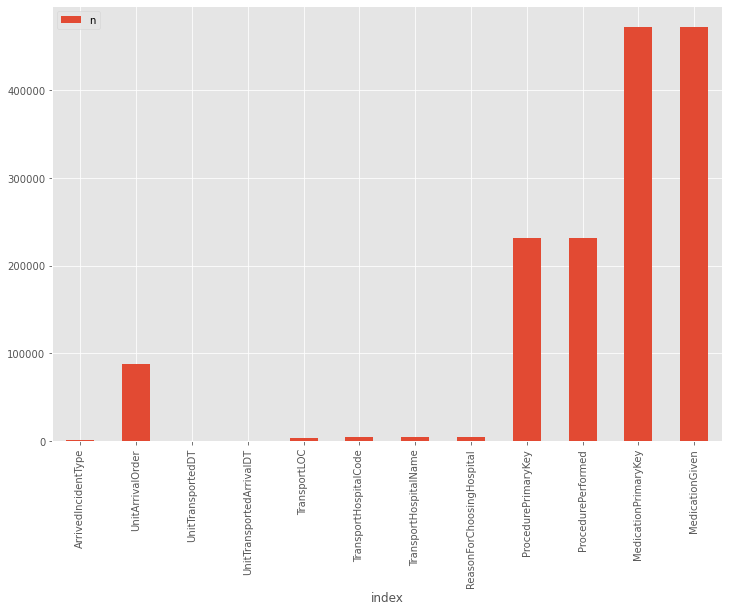

In [29]:
d1.isnull().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90)